## Teoría cuántica básica, observables y medidas

CNYT

Daniel Felipe Ruiz Bermúdez

In [ ]:
import numpy as np

numPuntos = int(input())  ## Numero de puntos que puede ocupar la partícula

amplitudes = input() ## Las amplitudez se deben dar separadas por comas: j, 2j, 3+j, 2

ket = np.array([complex(x) for x in amplitudes.split(",")])

print(ket[0])

posicion = input()

def probPosicion(ket, posicion):   ## La posicion se debe dar como xn, por ejemplo, x0,x1,x2
    posiX = int(posicion[1:])

    moduloCuadradoPosicion = np.abs(ket[posiX])**2
    magnitudKet = np.sum(np.abs(ket)**2)
    

    probabilidad = moduloCuadradoPosicion / magnitudKet

    return probabilidad

print(probPosicion(ket, posicion))

(-3-1j)
0.5263157894736843


## Retos Capítulo 4


#### Probabilidad de transición


In [6]:

amplitud1 = input()
ketInicial = [complex(x) for x in amplitud1.split(",")] 

amplitud2 = input()
ketFinal = [complex(x) for x in amplitud2.split(",")] 

def probTransición(ketSalida, ketLlegada):
    productoInterno = np.vdot(ketLlegada, ketSalida)

    magnitudEstInicial = np.sum(np.abs(ketSalida)**2)
    magnitudEstLlegada = np.sum(np.abs(ketLlegada)**2)

    probTransicion = (np.abs(productoInterno)**2) / (magnitudEstInicial * magnitudEstLlegada)

    return probTransicion

print(probTransición(ketInicial, ketFinal))

1.0


#### Valor esperado y Varianza

con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [ ]:
import numpy as np

matrix = input()
ket = input()

### Se recibe la matriz como el siguiente ejemplo: "[[2,3],[4,5]]" sin espacios después de la coma
def vEsperadoYVarianza(matrix, ketp):
    matriz = np.array(eval(matrix), dtype=np.complex128)  
    ket = np.array(eval(ketp), dtype=np.complex128) 
    is_hermitian = np.allclose(matriz, matriz.conj().T)  # Verificar si es hermitiana

    if is_hermitian:
        gPorKet = np.dot(matriz, ket)  # Multiplicación matriz por ket

        productoInterno = np.vdot(ket, gPorKet)  # Producto interno <ψ|Ω|ψ> = <ψ, Ωψ>
        valorEsperado = productoInterno 

        ### Delta ΔΩ = Ω - <Ω>I
        identidad = np.eye(matriz.shape[0])  
        deltaOmega = matriz - valorEsperado * identidad  #### ΔΩ = Ω - <Ω>I

        ### Forumula (ΔΩ*ΔΩ)ψ

        deltaCuadrado = np.dot(deltaOmega, deltaOmega)

        deltaOmegaKet = np.dot(deltaCuadrado, ket)

        ### Cálculo de la varianza: Var(Ω) = <ψ,(ΔΩ*ΔΩ)ψ>
        varianza = np.vdot(deltaOmegaKet, ket)

        print(valorEsperado)
        print(varianza)
    else:
        print("La matriz no es hermitiana.")

vEsperadoYVarianza(matrix,ket)
# Ejemplo
Omega = "[[2, 0],[0, 5]]"
ket = "[[1/np.sqrt(2)], [1/np.sqrt(2)]]"

### ValorEsperado = 3.5
### Varianza = 2.25


3.499999999999999
2.2499999999999996


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [ ]:
import numpy as np


matrix = input()  ## Observable
ketp = input()  ## Ket inicial

# Convertir a arrays de numpy
matriz = np.array(eval(matrix), dtype=complex)
ket = np.array(eval(ketp), dtype=complex)


if np.allclose(matriz, matriz.conj().T):    ### Hermitiana
    ## valores propios resolviendo el polinomio característico
    valores_propios = np.roots(np.poly(matriz))

    ### vectores propios
    vectores_propios = []
    identidad = np.eye(matriz.shape[0], dtype=complex)

    for lamb in valores_propios:
        # Resolver (A - lambda I)v = 0 
        sistema = matriz - lamb * identidad
        vector_propio = np.linalg.null_space(sistema)[:, 0]  # Tomar una solución
        vector_propio /= np.linalg.norm(vector_propio)  # Normalizar
        vectores_propios.append(vector_propio)

    vectores_propios = np.array(vectores_propios).T  # Convertir a matriz

    
    print(valores_propios)
    print(vectores_propios)

    # 3. Calcular probabilidades de transición
    probabilidades = np.abs(np.dot(vectores_propios.T.conj(), ket))**2  ## Como están normalizados no se divide por la multiplicación de las magnitudes al cuadrado

    print("Probabilidades de transición:")
    print(probabilidades)
else:
    print("La matriz no es hermitiana, no representa un observable válido.")


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [ ]:
import numpy as np

## Pedir el ket inicial
psi = input("Ingrese el ket inicial como lista de números complejos: ")
psi = np.array(eval(psi), dtype=complex)  


n = int(input("Ingrese el número de matrices U: ")) ### número de matrices U

for i in range(n):
    U = input("Ingrese la matriz U en formato [[a,b],[c,d]]: ")
    U = np.array(eval(U), dtype=complex) 
    psi = np.dot(U, psi)  


print("El estado final del sistema es:")
print(psi)


Ejercicio 4.4.1

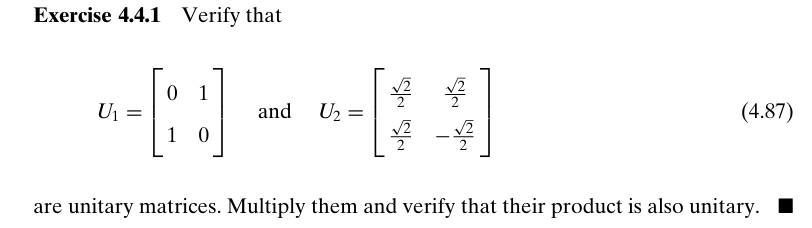

In [ ]:
import numpy as np


U1 = np.array([[0, 1], [1, 0]], dtype=complex)
U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]], dtype=complex)

## Adjunta de cada una
U1_adj = np.conjugate(U1.T)
U2_adj = np.conjugate(U2.T)

## Verificar si U1 * U1_adj es la identidad
print("U1 es unitaria?", np.allclose(np.dot(U1, U1_adj), np.array([[1, 0], [0, 1]])))

## Verificar si U2 * U2_adj es la identidad
print("U2 es unitaria?", np.allclose(np.dot(U2, U2_adj), np.array([[1, 0], [0, 1]])))


U_product = np.dot(U1, U2)

# Calcular la adjunta del producto
U_product_adj = np.conjugate(U_product.T)

# Verificar si U_product * U_product_adj es la identidad
print("U1 * U2 es unitario?", np.allclose(np.dot(U_product, U_product_adj), np.array([[1, 0], [0, 1]])))

## U1*U2
print("U1 * U2 =\n", U_product)


U1 es unitaria? True
U2 es unitaria? True
U1 * U2 es unitario? True
U1 * U2 =
 [[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]


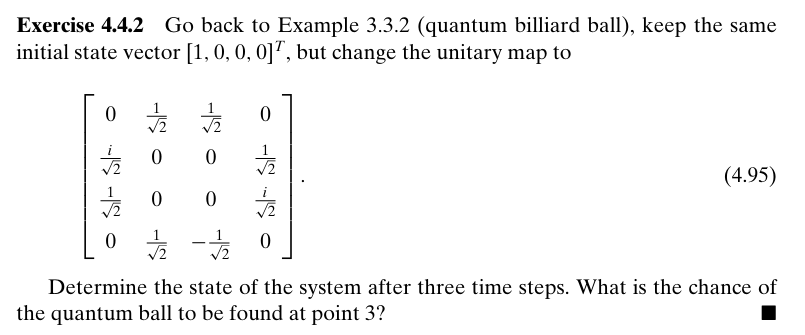

In [5]:
import numpy as np

U = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [0, 0, 0, 1j/np.sqrt(2)],
    [1/np.sqrt(2), 1/np.sqrt(2), 1j/np.sqrt(2), 0]], dtype=complex)

## Estado inicial
psi = np.array([1, 0, 0, 0], dtype=complex)

# Aplicar U tres veces
psi = np.dot(U, np.dot(U, np.dot(U, psi)))

# Probabilidad de estar en x3
prob_x3 = np.abs(psi[2])**2

print("estado final", psi)
print("Probabilidad de estar en x3", prob_x3)


estado final [ 0.35355339+0.35355339j -0.35355339+0.35355339j -0.35355339+0.j
  0.        +0.35355339j]
Probabilidad de estar en x3 0.12499999999999994
